In [2]:
from cleaning import get_clean_data,get_data,plot_accidents
import numpy as np
import matplotlib.pyplot as plt
data = get_clean_data()

/Users/eladhershkoviz/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (79,183,189) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Dropping columns with missing values > 10%:
Index(['RDWY_SURF_TYPE_CD', 'SPEC_JURIS_CD', 'TFC_DETOUR_IND',
       'WORK_ZONE_TYPE', 'WORK_ZONE_LOC', 'CONS_ZONE_SPD_LIM', 'WORKERS_PRES',
       'WZ_CLOSE_DETOUR', 'WZ_FLAGGER', 'WZ_LAW_OFFCR_IND', 'WZ_LN_CLOSURE',
       'WZ_MOVING', 'WZ_OTHER', 'WZ_SHLDER_MDN'],
      dtype='object')
Dropping 21 highly correlated columns
['LOCAL_ROAD_ONLY', 'WORK_ZONE', 'INTERSECTION', 'SCHOOL_BUS', 'SCHOOL_ZONE', 'MOTORCYCLE', 'BICYCLE', 'HVY_TRUCK_RELATED', 'DRINKING_DRIVER', 'DRIVER_16YR', 'DRIVER_17YR', 'DRIVER_65_74YR', 'DRIVER_75PLUS', 'DRIVER_18YR', 'DRIVER_19YR', 'DRIVER_20YR', 'DRIVER_50_64YR', 'COMM_VEHICLE', 'IMPAIRED_DRIVER', 'DEER_RELATED', 'DRUG_RELATED']


/Users/eladhershkoviz/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (79,183,189) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


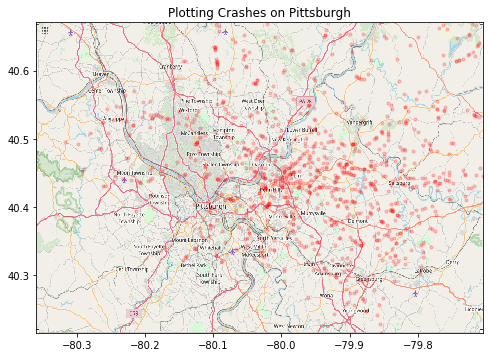

In [3]:
plot_accidents(get_data("crash.csv"))

Sevirity precentages:

Not injured        50.75%
Minor injury       19.09%
Injury Unknown     14.64%
Moderate injury    9.402%
Unknown            3.592%
Major injury       1.954%
Killed             0.554%
Name: MAX_SEVERITY_LEVEL, dtype: object


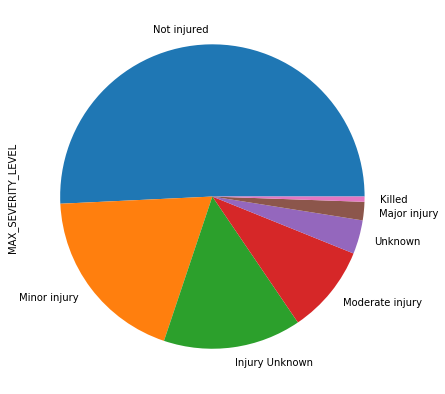

In [4]:
#first figuer pie char of injury level

labels={
0:'Not injured',
1:'Killed',
2:'Major injury',
3:'Moderate injury',
4:'Minor injury',
8:'Injury Unknown',
9:'Unknown'}
severity_data=data['MAX_SEVERITY_LEVEL'].value_counts()
severity_data= severity_data.rename(labels)
severity_data.plot.pie(figsize=(7,7))
total = severity_data.sum()
sev = severity_data.apply(lambda x: str(x/total*100)[:5]+'%')
print('Sevirity precentages:\n')
print(sev)

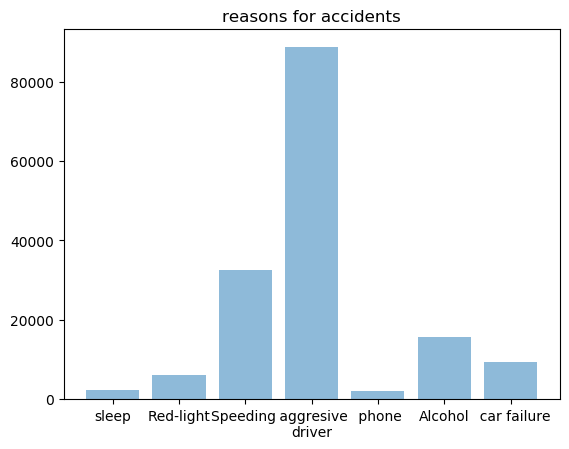

In [5]:
#second figure : reasons for accidents:
reasons=[
'FATIGUE_ASLEEP',
# 'RUNNING_STOP_SIGN',
'RUNNING_RED_LT',
'SPEEDING_RELATED',
'AGGRESSIVE_DRIVING',
'CELL_PHONE',
'ALCOHOL_RELATED',
'VEHICLE_FAILURE'
]
labels = ['sleep','Red-light','Speeding ',' aggresive\ndriver',' phone','Alcohol','  car failure']
total =0
counts=[]
for i in reasons:
    total+=len(data[data[i]==1].index)
    counts.append(len(data[data[i]==1].index))
y_pos = np.arange(len(reasons))
plt.rcdefaults()
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.title('reasons for accidents')
plt.show()


In [6]:
#feature engineering
#creat new categorical column for time of day
import pandas as pd
data = get_data("crash.csv")
f = data['TIME_OF_DAY'].dropna()
f = data.loc[(data.TIME_OF_DAY > 0) & (data.TIME_OF_DAY < 2400)]

bins = [-np.inf,600,1200,1800,2400]

labels=['late night','morning','afternoon','night']

f['time'] = pd.cut(data.TIME_OF_DAY, bins=bins, labels=labels)

/Users/eladhershkoviz/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (79,183,189) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/eladhershkoviz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


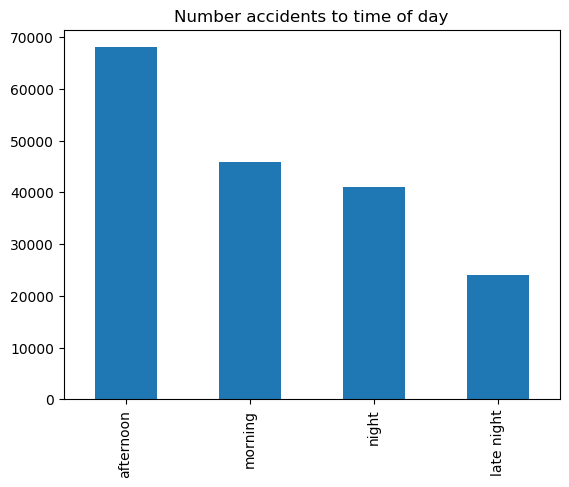

In [7]:
#figure 3 : accidents per time of day
#late night:12am-6am, morning :6am-12pm , afternoon: 12 - 6pm, night :6 - 12am
plt.title('Number accidents to time of day')
f['time'].value_counts().plot(kind='bar')


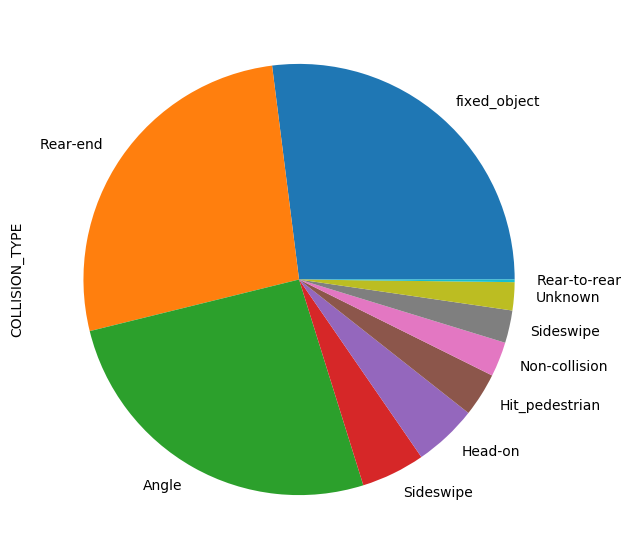

In [8]:
#figure 4 type of collision


lab={
0 : 'Non-collision',
1 : 'Rear-end',
2 : 'Head-on',
3 : 'Rear-to-rear',
4 : 'Angle',
5 : 'Sideswipe' ,
6 : 'Sideswipe' , 
7 : 'fixed_object',
8 : 'Hit_pedestrian',
9 : 'Unknown'}
col_data=data['COLLISION_TYPE'].value_counts()

col_data= col_data.rename(lab)
col_data.plot.pie(figsize=(7,7))


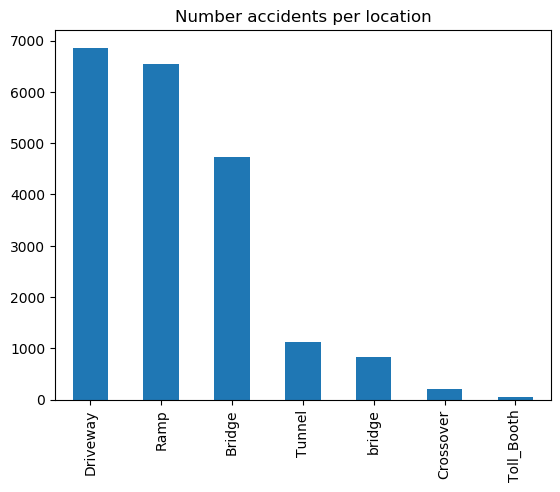

In [9]:
loc={
    
    1 : 'Underpass',
    2 : 'Ramp',
    3 : 'Bridge',
    4 : 'Tunnel',
    5 : 'Toll_Booth',
    6 : 'Crossover',
    7 : 'Driveway', 
    8 : 'bridge',
}

loc_data = data.loc[(data.LOCATION_TYPE > 1) & (data.LOCATION_TYPE < 9)]
loc_data=loc_data['LOCATION_TYPE'].value_counts().rename(loc)
plt.title('Number accidents per location')
loc_data.plot(kind='bar')


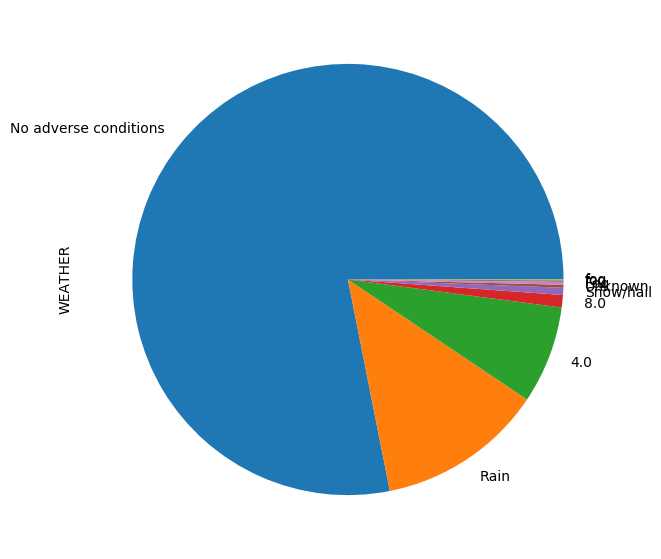

In [10]:
weather={
1 : 'No adverse conditions',
2 : 'Rain',
3 : 'Snow/hail',
5 : 'Fog',
6 : 'fog',
7 : 'fog',
9 : 'Unknown'}

weather_data=data['WEATHER'].value_counts()
weather_data= weather_data.rename(weather)
weather_data.plot.pie(figsize=(7,7))


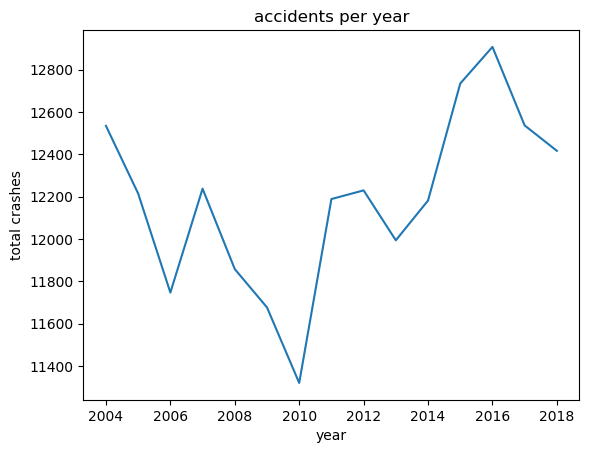

In [11]:
#plot of accidents per year
d = data
d['count']=1
d =data.groupby('CRASH_YEAR').agg(['sum']).reset_index()
x,y = d['CRASH_YEAR'],d['count']
plt.title('accidents per year')
plt.xlabel('year')
plt.ylabel('total crashes')
plt.plot(x,y)
# 

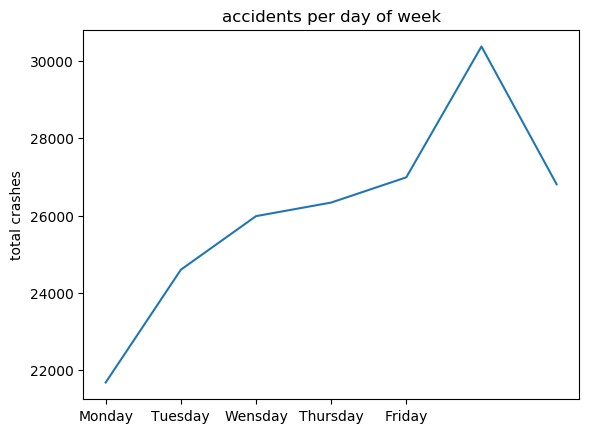

In [15]:

d = data
d['count']=1
d =data.groupby('DAY_OF_WEEK').agg(['sum']).reset_index()
x,y = d['DAY_OF_WEEK'],d['count']
plt.title('accidents per day of week')

plt.ylabel('total crashes')

plt.xticks([, ['Sunday','Monday','Tuesday','Wensday','Thursday','Friday','Saturday'])

plt.plot(x,y)
